In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
sns.set(color_codes=True)

# **Extraction and Cleaning**

In [34]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.xls")

In [35]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

print(df.isnull().sum())

df.dropna(subset=['bmi'], inplace=True)

df.fillna({"smoking_status": 'Unknown'}, inplace=True)

df.drop(columns=['id'], inplace=True)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [29]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [37]:
original = df.copy(deep=True)

# **Transformation**

In [40]:
binary_cols = ['gender', 'ever_married', 'Residence_type']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df['is_senior_citizen'] = (df['age'] >= 60).astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  is_senior_citizen  5110 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 519.1+ KB


In [42]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_senior_citizen
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,1


In [43]:
df["work_type"].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [44]:
df["smoking_status"].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [45]:
df.replace({"work_type": {"Self-employed": 0, "Private": 1, "Govt_job": 2, "children": 3, "Never_worked": 4}}, inplace=True)
df.replace({"smoking_status": {"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3}}, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
 12  is_senior_citizen  5110 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 519.1 KB


In [47]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_senior_citizen
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,0,1,1
1,51676,0,61.0,0,0,1,0,0,202.21,NaN,1,1,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.5,1,1,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,2,1,0
4,1665,0,79.0,1,0,1,0,0,174.12,24.0,1,1,1


# **Analysis and Visualization**

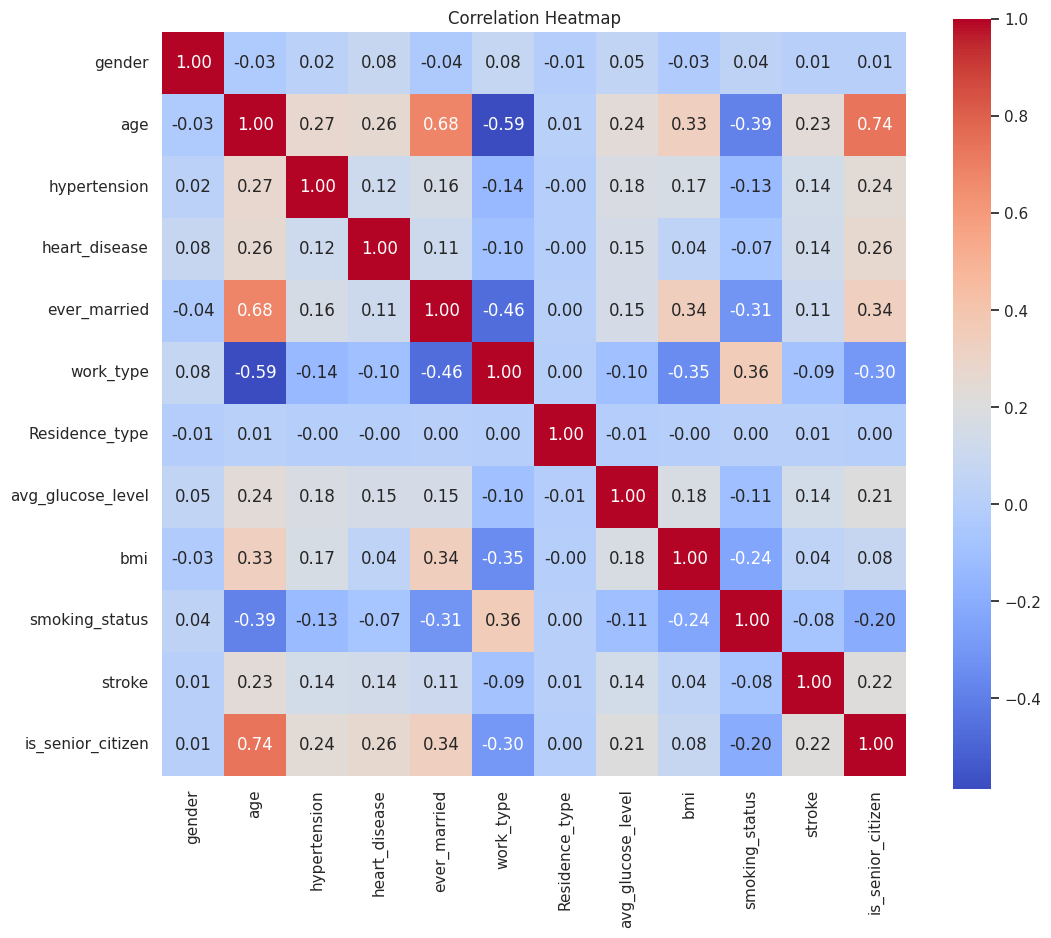

In [15]:
plt.figure(figsize=(12, 10))

corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

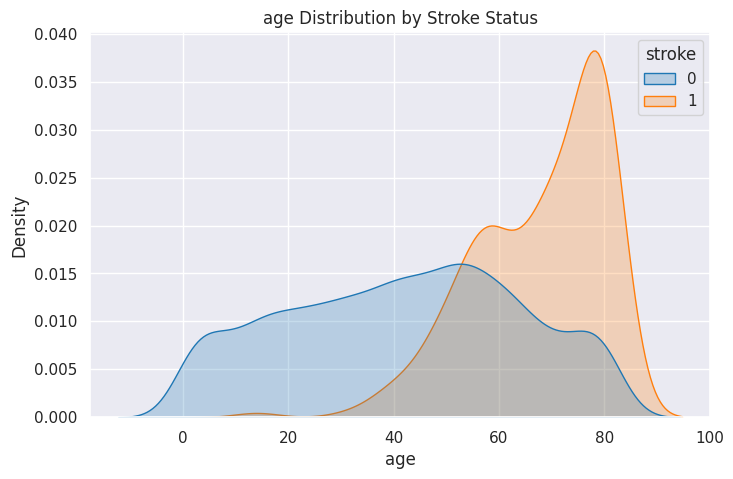

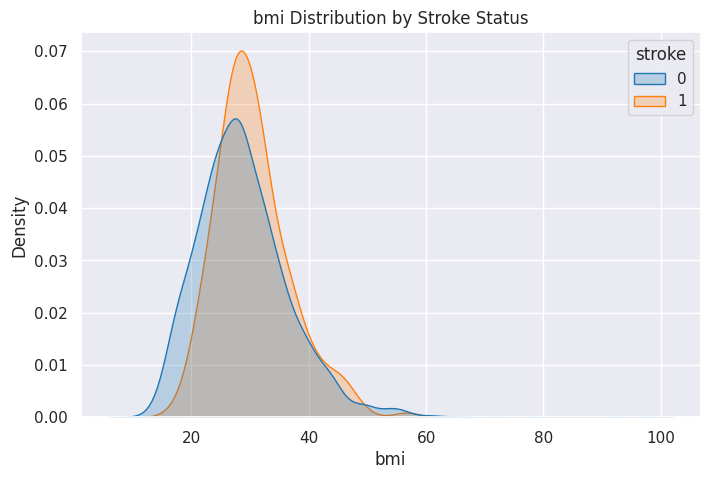

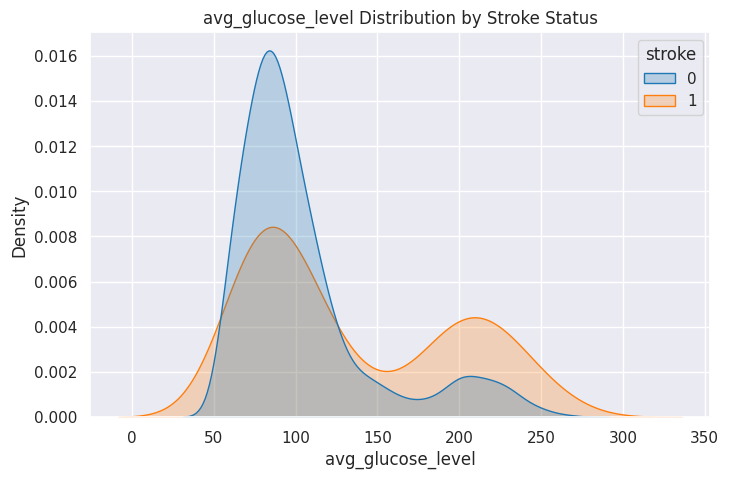

In [16]:
features = ['age', 'bmi', 'avg_glucose_level']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=feature, hue="stroke", fill=True, common_norm=False, palette="tab10")
    plt.title(f'{feature} Distribution by Stroke Status')
    plt.show()


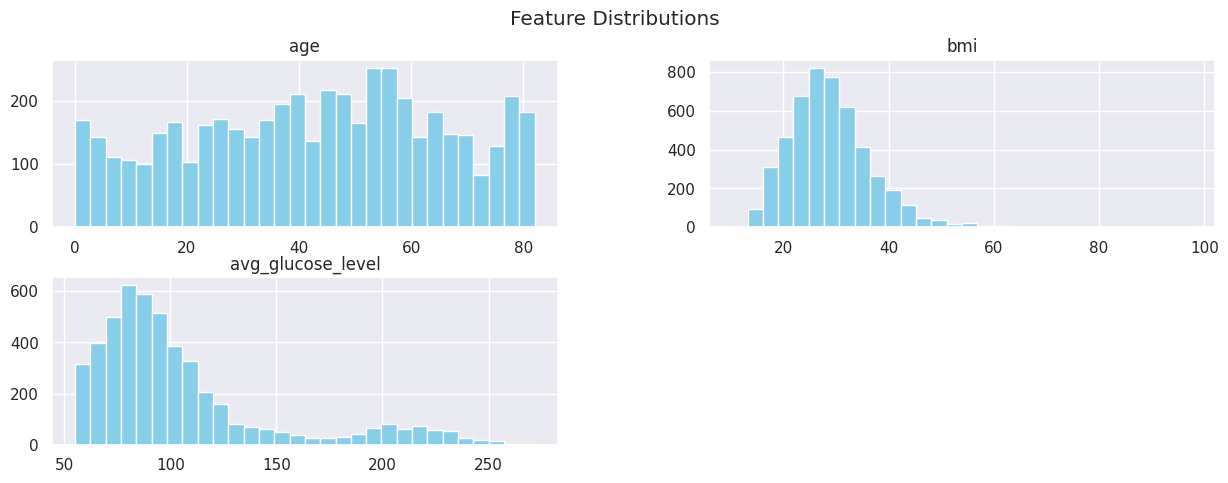

In [17]:
df[['age', 'bmi', 'avg_glucose_level']].hist(figsize=(15, 5), bins=30, color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

# **Training Algorithm**

In [18]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [65]:
print(confusion_matrix(y_test, y_pred))

[[939   1]
 [ 42   0]]


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



# **Prediction Algorithm**

In [58]:
def predict_stroke(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, is_senior_citizen):
    input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'ever_married': [ever_married],
        'work_type': [work_type],
        'Residence_type': [Residence_type],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'smoking_status': [smoking_status],
        'is_senior_citizen': [is_senior_citizen]
    })

    try:
        input_data['gender'] = gender_encoder.transform(input_data['gender'])
        input_data['ever_married'] = ever_married_encoder.transform(input_data['ever_married'])
        input_data['work_type'] = work_type_encoder.transform(input_data['work_type'])
        input_data['Residence_type'] = residence_type_encoder.transform(input_data['Residence_type'])
        input_data['smoking_status'] = smoking_status_encoder.transform(input_data['smoking_status'])
    except NameError as e:
        return f"Error: A LabelEncoder is not defined. Please ensure all encoders (gender_encoder, etc.) are fitted and available. Details: {e}"
    except ValueError as e:
        return f"Error during encoding: {e}. \nPlease ensure input values for categorical features are valid and were seen by the encoder during training (e.g., for 'gender', use 'Male' or 'Female' as per your training data, not 'Other' if it was handled)."
    except Exception as e:
        return f"An unexpected error occurred during encoding: {e}"

    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)

    if prediction[0] == 1:
        return f"Prediction: Stroke (Confidence: {probability[0][1]*100:.2f}%)"
    else:
        return f"Prediction: No Stroke (Confidence: {probability[0][0]*100:.2f}%)"

In [53]:
gender_encoder = LabelEncoder()
ever_married_encoder = LabelEncoder()
work_type_encoder = LabelEncoder()
residence_type_encoder = LabelEncoder()
smoking_status_encoder = LabelEncoder()

original['gender_encoded'] = gender_encoder.fit_transform(original['gender'])

original['ever_married_encoded'] = ever_married_encoder.fit_transform(original['ever_married'])

original['work_type_encoded'] = work_type_encoder.fit_transform(original['work_type'])

original['Residence_type_encoded'] = residence_type_encoder.fit_transform(original['Residence_type'])

original['smoking_status_encoded'] = smoking_status_encoder.fit_transform(original['smoking_status'])

In [54]:
gender = input("Gender (Male/Female): ")
age = int(input("Age: "))
hypertension = int(input("Hypertension (0/1): "))
heart_disease = int(input("Heart Disease (0/1): "))
ever_married = input("Ever Married (Yes/No): ")
work_type = input("Work Type (Self-employed/Private/Govt_job/children/Never_worked): ")
Residence_type = input("Residence Type (Urban/Rural): ")
avg_glucose_level = float(input("Average Glucose Level: "))
bmi = float(input("BMI: "))
smoking_status = input("Smoking Status (formerly smoked/never smoked/smokes): ")
is_senior_citizen = 1 if age >= 60 else 0

Gender (Male/Female): Male
Age: 62
Hypertension (0/1): 1
Heart Disease (0/1): 1
Ever Married (Yes/No): Yes
Work Type (Self-employed/Private/Govt_job/children/Never_worked): children
Residence Type (Urban/Rural): Urban
Average Glucose Level: 99
BMI: 30
Smoking Status (formerly smoked/never smoked/smokes): formerly smoked


In [59]:
predict_stroke(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, is_senior_citizen)

'Prediction: No Stroke (Confidence: 89.00%)'